<a href="https://colab.research.google.com/github/mutthias/Stroke-Predictor/blob/main/StrokePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px

# Warning (to ignore)
import warnings
warnings.filterwarnings("ignore")


path = "/content/drive/MyDrive/healthcare-dataset-stroke-data.csv"
df = pd.read_csv(path)

# Store dataset in Pandas dataframe


In [ ]:
# Exploring and Data Analysis

# Summary
df.info()

# Unique Values
print()
print("The number of unique values for each column are as follows:")
print(df.nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

The number of unique values for each column are as follows:
id                   5110
gender                  3
age                   104
hypertension      

In [ ]:
# With Hypertension
print("Hypertension:")
print(df.hypertension.value_counts())
print()

# With heart disease
print("Heart Disease:")
print(df.heart_disease.value_counts())
print()

# Married
print("Married:")
print(df.ever_married.value_counts())
print()

# Work Type
print("Work Type:")
print(df.work_type.value_counts())
print()

# Residence Type
print("Residence Type:")
print(df.Residence_type.value_counts())
print()

# Smoking status
print("Smoking Status:")
print(df.smoking_status.value_counts())
print()

# Stroke
print("Stroke:")
print(df.stroke.value_counts())
print()

Hypertension:
0    4612
1     498
Name: hypertension, dtype: int64

Heart Disease:
0    4834
1     276
Name: heart_disease, dtype: int64

Married:
Yes    3353
No     1757
Name: ever_married, dtype: int64

Work Type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence Type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

Smoking Status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Stroke:
0    4861
1     249
Name: stroke, dtype: int64



In [ ]:
df = df.drop(df[df['gender'] == 'Other'].index)

print("Gender:")
print(df.gender.value_counts())
print()

Gender:
Female    2994
Male      2115
Name: gender, dtype: int64



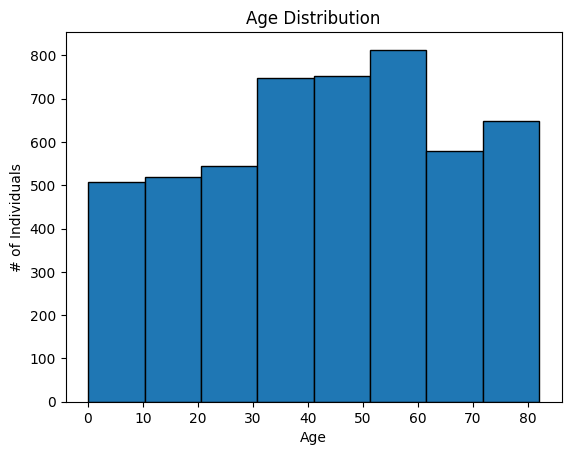

In [ ]:
plt.hist(df['age'], bins=8, edgecolor='k')
plt.xticks(range(0, 85, 10))
plt.xlabel('Age')
plt.ylabel('# of Individuals')
plt.title('Age Distribution')
plt.grid(False)
plt.show()

In [ ]:
df['work_type'] = np.where(df['work_type'] == "children", "Never_worked", df['work_type'])


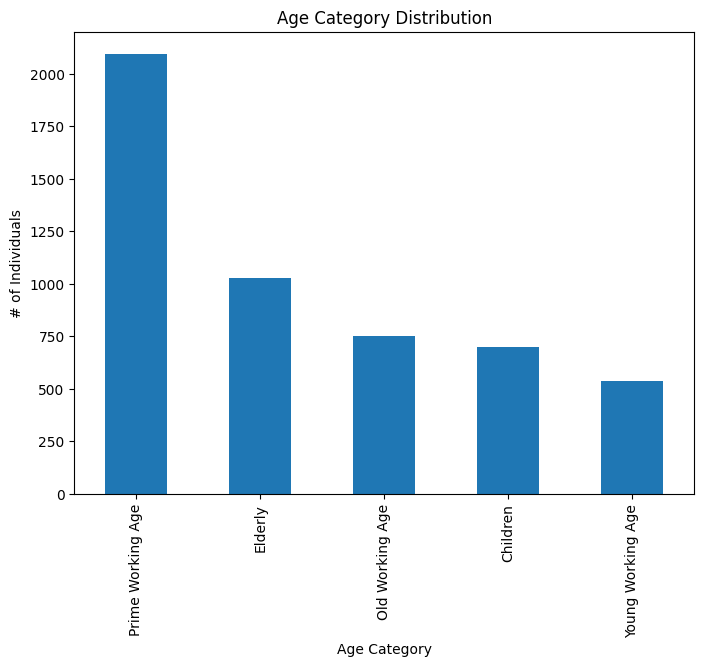

In [ ]:
age_conditions = [
    (df['age'] <= 14),
    (df['age'] >= 15) & (df['age'] <= 24),
    (df['age'] >= 25) & (df['age'] <= 54),
    (df['age'] >= 55) & (df['age'] <= 64),
    (df['age'] >= 65),
]

values = [
    "Children",
    "Young Working Age",
    "Prime Working Age",
    "Old Working Age",
    "Elderly"
]

df["Age_Category"] = np.select(age_conditions, values)

age_category_counts = df['Age_Category'].value_counts()
age_category_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('# of Individuals')
plt.show()

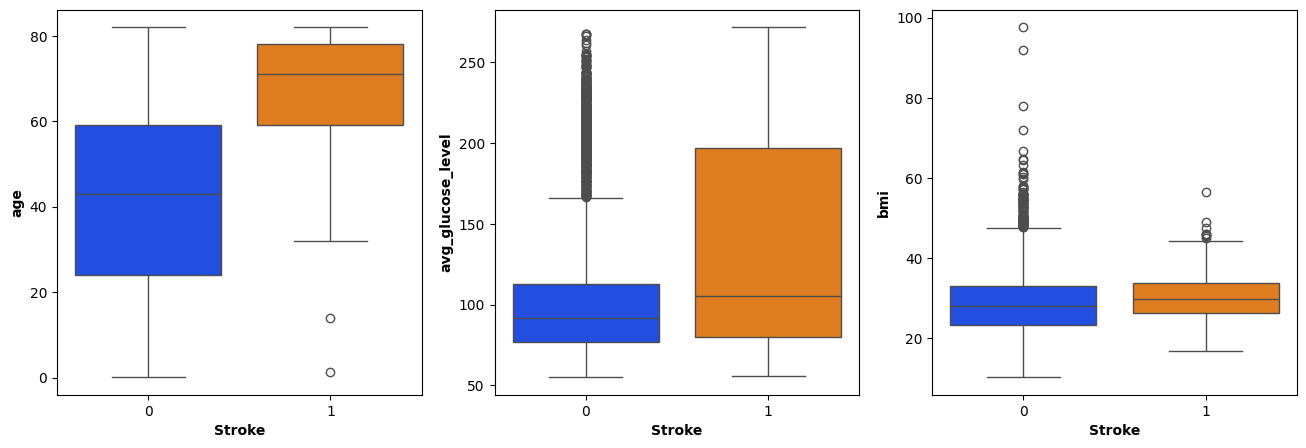

In [ ]:
df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

for i, col_name in enumerate(df_num):
  sns.boxplot(x = "stroke", y = col_name, data = df, ax = axs[i], palette = 'bright')
  axs[i].set_xlabel("Stroke", weight = 'bold')
  axs[i].set_ylabel(f"{col_name}", weight= 'bold')

# Some observations:
#   - Most people that get a stoke are above the age of 60.
#   - People with a glucose level above approximately 110 are most likely to have a stroke
#   - BMI does NOT have a significant effect on strokes




In [ ]:
mean = df['bmi'].mean()
mean = round(mean, 4)
df['bmi'].fillna(mean)

0       36.6000
1       28.8946
2       32.5000
3       34.4000
4       24.0000
         ...   
5105    28.8946
5106    40.0000
5107    30.6000
5108    25.6000
5109    26.2000
Name: bmi, Length: 5109, dtype: float64

In [ ]:
# df.describe()
# df.median()
print(df.info)

<bound method DataFrame.info of          id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban 

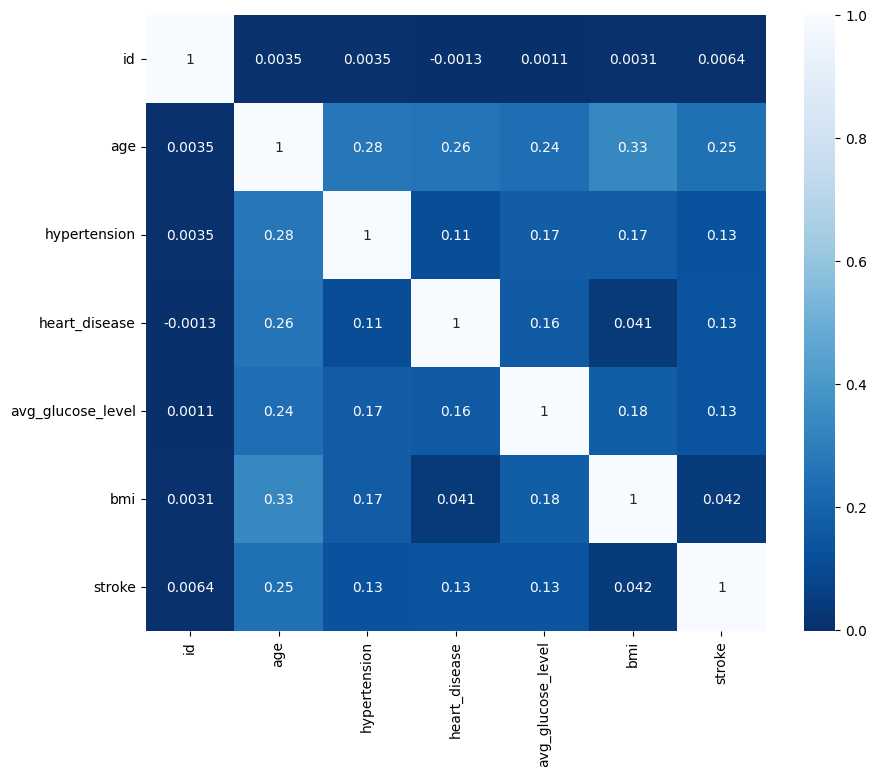

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues_r')
plt.show()

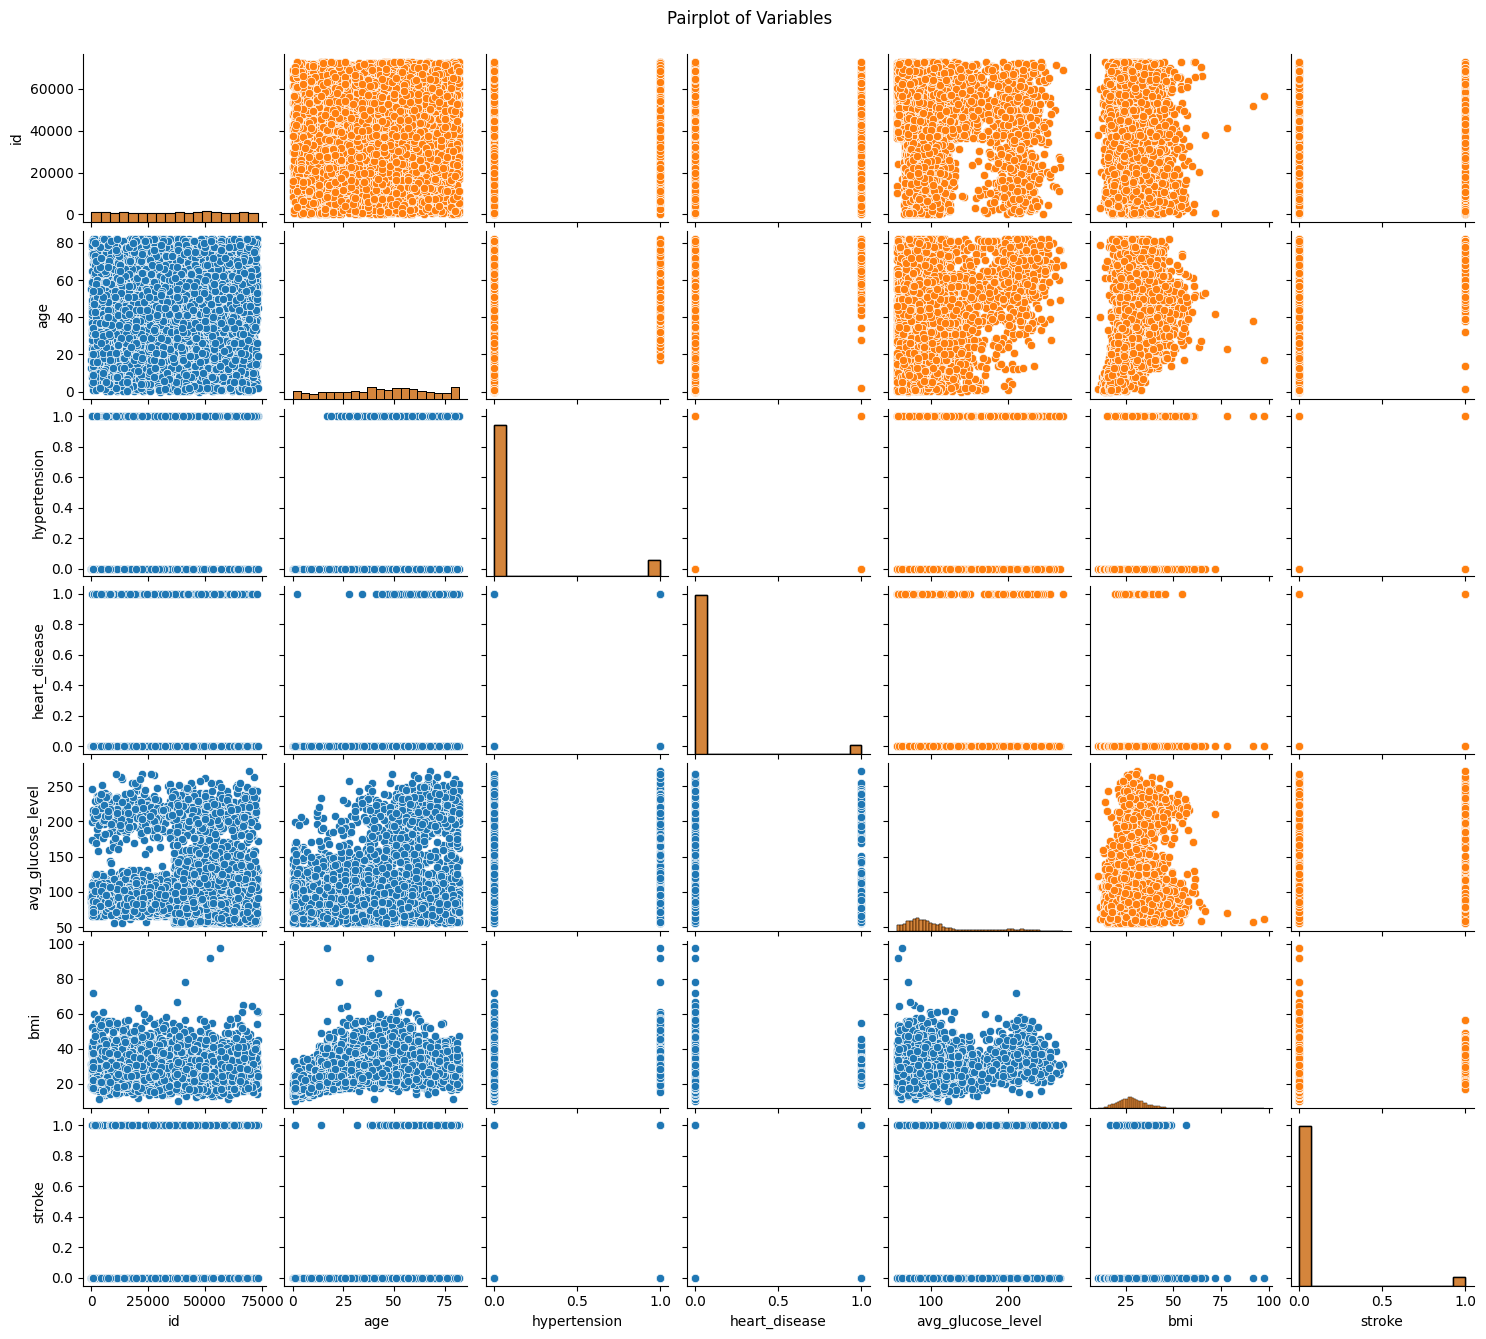

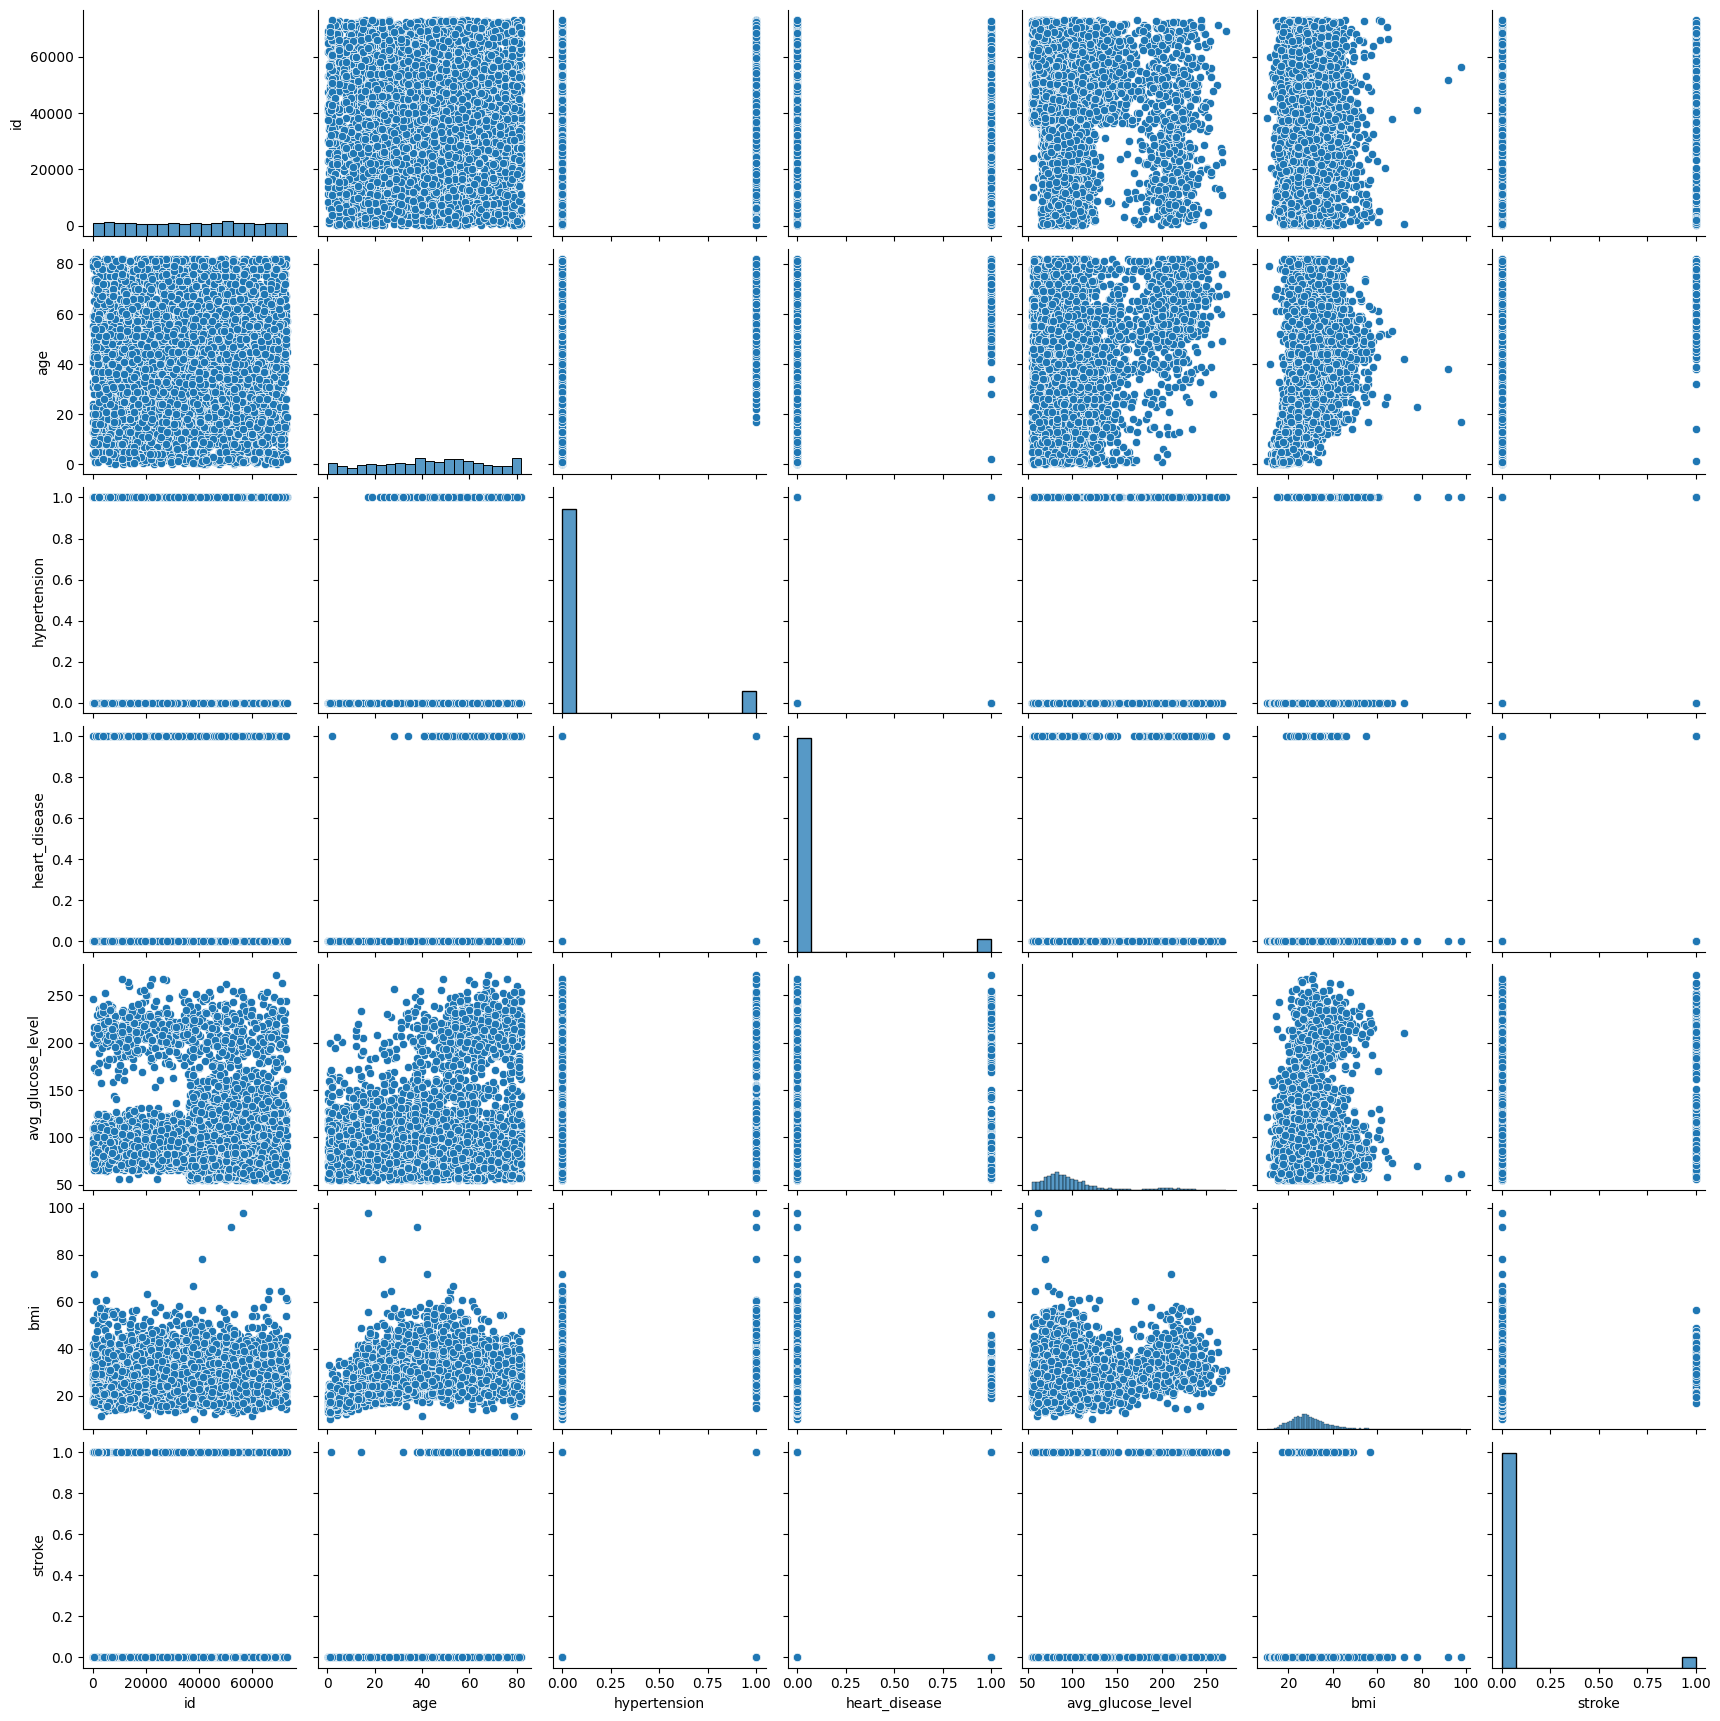

In [ ]:
g = sns.pairplot(df, markers=["o", "s", "D"])  # Add hue for categorical variable and customize markers

# Customizing the titles of scatter plots:
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})

# Adding a title to the overall pairplot:
g.fig.suptitle("Pairplot of Variables", y=1.02)

# Adjusting the figure size:
g.fig.set_size_inches(15, 13)

# Adjusting color palette:
g = sns.pairplot(df, palette="viridis")

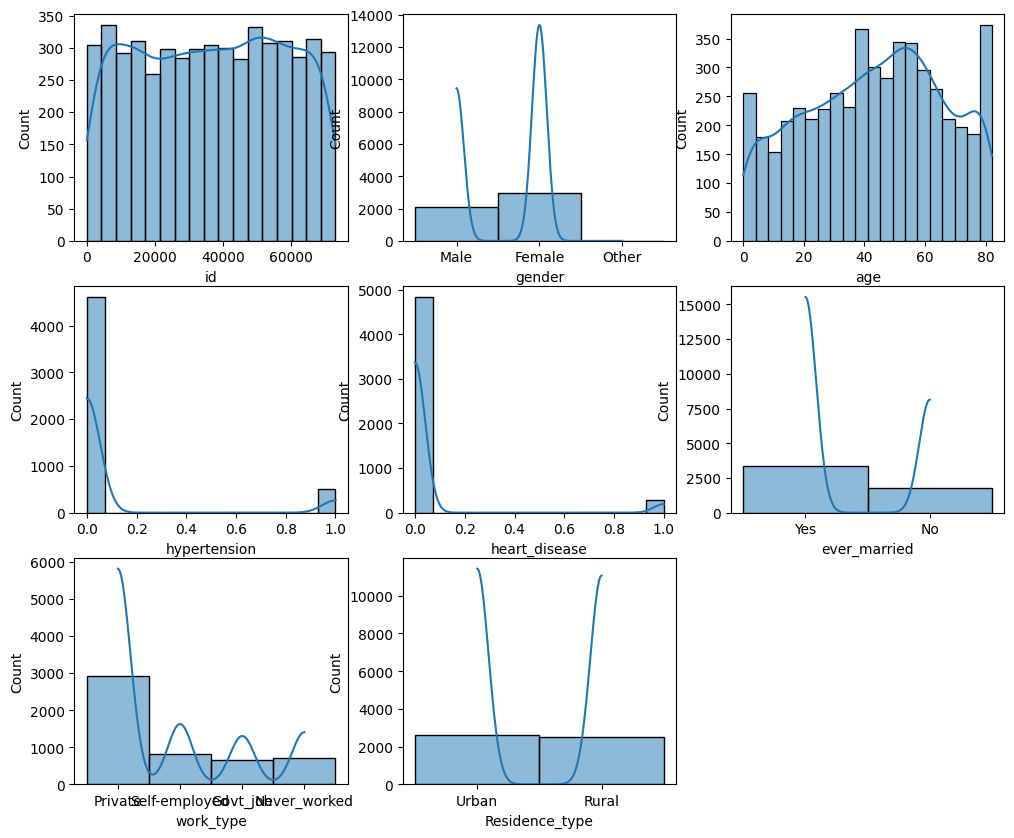

In [ ]:
plt.figure(figsize=(12,10))
for i, column in enumerate(df.columns[:8]):
  plt.subplot(3, 3, i + 1)
  sns.histplot(df[column], kde = True, common_norm = False)

plt.show()

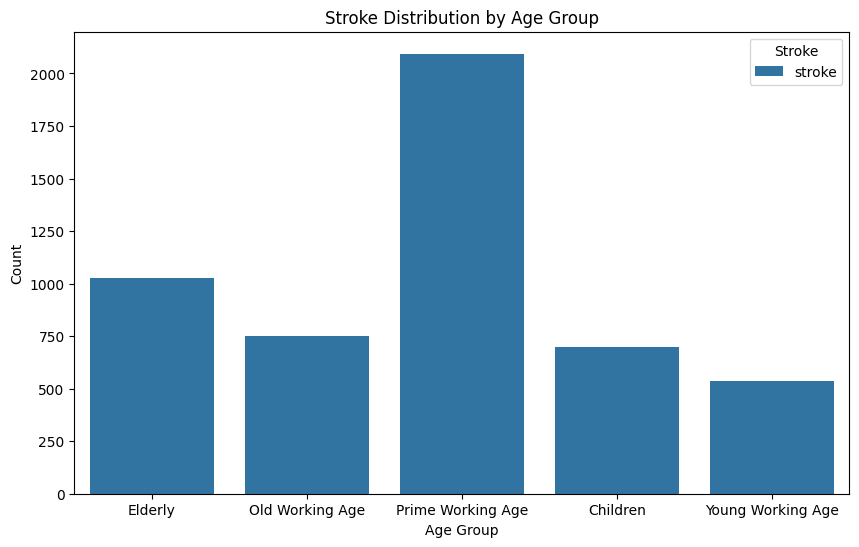

In [ ]:
new_df = pd.concat([df['Age_Category'], df['stroke']], axis=1)

melted_df = pd.melt(new_df, id_vars='Age_Category', var_name='Stroke', value_name='Count')

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Category', hue='Stroke', data=melted_df)
plt.title('Stroke Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Old Working Age
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Prime Working Age
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly


In [ ]:
df = df.drop('id', axis = 1)
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Age_Category
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Old Working Age
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Prime Working Age
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elderly


In [ ]:
cols = list(df.columns)
df = df[cols[0:10] + [cols[-1]] + [cols[10]] ]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_Category,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Elderly,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Old Working Age,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Elderly,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Prime Working Age,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Elderly,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['Age_Category'] = le.fit_transform(df['Age_Category'])

df_en = df
df_en.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,Age_Category,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1,1


<Axes: >

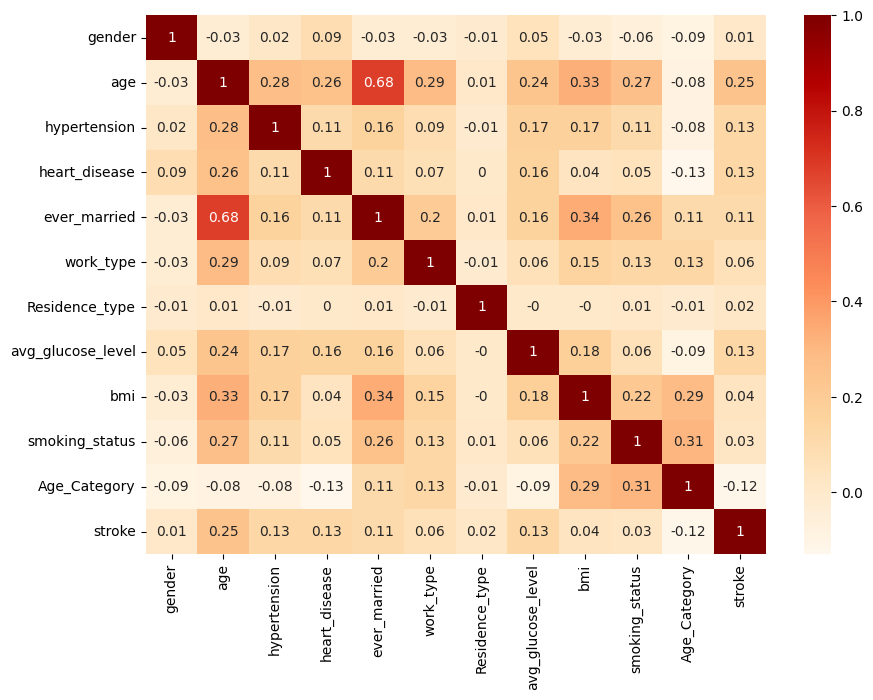

In [ ]:
corr = df_en.corr().round(2)
plt.figure(figsize = (10,7))
sns.heatmap(corr,annot = True, cmap = 'OrRd')

In [ ]:
df_en = df_en.drop('ever_married', axis = 1)
df_en.head()

KeyError: "['ever_married'] not found in axis"

In [ ]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
columns = ['avg_glucose_level', 'bmi', 'age']
stand_scaled = s.fit_transform(df_en[['avg_glucose_level', 'bmi', 'age']])
stand_scaled = pd.DataFrame(stand_scaled, columns=columns)
df_en = df_en.drop(columns=columns, axis=1)


In [ ]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head()

,gender,hypertension,heart_disease,work_type,Residence_type,smoking_status,Age_Category,stroke,avg_glucose_level,bmi,age
0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.706450,0.981145,1.051242
1,0.0,0.0,0.0,3.0,0.0,2.0,2.0,1.0,2.121652,NaN,0.785889
2,1.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0,-0.004867,0.459086,1.626174
3,0.0,0.0,0.0,2.0,1.0,3.0,3.0,1.0,1.437473,0.701016,0.255182
4,0.0,1.0,0.0,3.0,0.0,2.0,1.0,1.0,1.501297,-0.623231,1.581949


In [ ]:
df = df.fillna(df.mode().iloc[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 3116
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   float64
 1   hypertension       5110 non-null   float64
 2   heart_disease      5110 non-null   float64
 3   work_type          5110 non-null   float64
 4   Residence_type     5110 non-null   float64
 5   smoking_status     5110 non-null   float64
 6   Age_Category       5110 non-null   float64
 7   stroke             5110 non-null   float64
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  age                5110 non-null   float64
dtypes: float64(11)
memory usage: 479.1 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

x = df.drop('stroke', axis = 1)
y = df['stroke']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size=0.3, random_state=2022, stratify=y, shuffle=True)
x_test.shape

y_train.value_counts(normalize=True)

0.0    0.951356
1.0    0.048644
Name: stroke, dtype: float64

In [ ]:
models = dict()
models['Logreg'] = LogisticRegression()
models['Random Forest'] = RandomForestClassifier(n_estimators=250, random_state=2022)

for model in models:
    models[model].fit(x_train, y_train)
    print(model + " model fitting completed.")

Logreg model fitting completed.
Random Forest model fitting completed.


In [ ]:
from sklearn.metrics import accuracy_score

print('\nSummary of Accuracy Score: -\n')
for model_name, model in models.items():
    print(model_name + ' Model: ', accuracy_score(y_test, model.predict(x_test)).round(4))


Summary of Accuracy Score: -

Logreg Model:  0.9517
Random Forest Model:  0.9498
